# Aprendizaje Automático - Práctica 3 - Ajuste de Modelos Lineales

# Problema de Regresión

#### Valoración máxima: 6 puntos 

#### Fecha límite de entrega: 4 de Junio de 2023 a las 23:59

#### Entrega a través de https://pradogrado2223.ugr.es/

### Nombre completo: <mark>DAVID MUÑOZ SÁNCHEZ</mark>



---

**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero .ipynb). No es necesario entregar ninguna memoria externa, pero el código debe estar bien comentado, y todas las decisiones tomadas y el trabajo desarrollado deben documentarse suficientemente en celdas de texto. 

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final, dado que es altamente improbable que se extienda la fecha de entrega.  

- Reiterar que es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también una valoración razonada sobre la calidad de los
resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado. 

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo. 

- El codigo NO puede escribir nada a disco.

- Se espera que el código siempre lea de un directorio llamado 'drive/MyDrive/Colab Notebooks/datos/', situado dentro del directorio donde se desarrolla y ejecuta la práctica. No se admiten excepciones a esta ruta de acceso a los datos. 

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- El código debe estar obligatoriamente comentado explicando lo que realizan los distintos apartados y/o bloques.

- Se entrega solamente este Notebook, y no los datos empleados.


---

<font color='blue'>Este trabajo  se centra en el ajuste y selección del mejor predictor lineal para un conjunto de datos dado. Para ello, se recomienda el uso de la librería Scikit-Learn (https://scikit-learn.org/). Esta librería contiene funciones de alto nivel que pueden ser muy útiles para el desarrollo de la práctica. En cualquier caso, para cada función de Scikit-Learn que se use, debe explicar por qué es necesario su uso, así como explicar su funcionamiento y el significado de todos sus parámetros. En relación con este punto, los valores por defecto en la librería no se consideran elecciones justificadas $\textit{a priori}$ y, al igual que en el resto de la práctica, decisiones sin justificación y resultados sin interpretación no serán considerados válidos. 



#### <font color='blue'>1)  Analizar y describir adecuadamente el problema a resolver. Identificar los elementos $X$, $Y$ and $f$ del problema, y describirlos en detalle. 0.5 puntos. 

In [246]:
#Para acceder a nuestros ficheros de Google Drive
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')
# La carpeta datos (que contiene X_train.npy, y_train.npy, X_test.npy y y_test.npy) 
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'
# Funcion para leer los datos
inicial = pd.read_csv('drive/MyDrive/Colab Notebooks/datos/OnlineNewsPopularity.csv',sep=',', low_memory=False, header=None)

#Se quitan las dos primeras columnas que son no predictivas según la información que se proporciona del datasetcha

df = inicial.iloc[1:, 2:]

#Obtener el nombre de las columnas que deseas convertir
columnas_a_convertir = df.columns

# Convertir las columnas a tipo float #Pone en la doc que son todas numéricas, así que se puede hacer esto
df[columnas_a_convertir] = df[columnas_a_convertir].astype(float)
df = df.select_dtypes(include='number')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,2,3,4,5,6,7,8,9,10,11,...,51,52,53,54,55,56,57,58,59,60
1,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593.0
2,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0
3,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500.0
4,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0
5,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39640,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800.0
39641,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900.0
39642,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900.0
39643,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100.0


In [247]:
print(df.columns,"\n\n", 'Número de características:', len(df.columns))

Int64Index([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
            36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
            53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64') 

 Número de características: 59


Echando un vistazo a la información proporcionada por Pandas acerca del Dataset leído desde Google Drive y tras quitar las dos columnas del dataset que no son predictivas (la primera y la segunda), podemos identificar los elementos del problema.

Nos encontramos ante un problema de regresión (la salida es continua), donde:


*   y es la popularidad de cierta noticia online.
*   X sería los parámetros medidos acerca de cierta noticia.
*   f sería la función que asignaría a cada vector de características X un valor de popularidad en y

Hablando más claro, nuestro **X** será una matriz donde cada fila tiene 58 columnas y nuestro **y** será un vector con tantas posiciones como filas tenga **X**, donde se representa la popularidad de cada noticia.



Antes de comenzar a analizar los datos, se divide el dataset en train y test, con objetivo de evitar prácticas como el data snooping.

El conjunto de test no se tocará en toda la práctica hasta que sea necesario estimar Eout.

La división se ha hecho con la función que ya tiene preparada sklearn y que devuelve directamente los conjunto de train y test para la X y para la y.

Se ha decidido que test cuente con el 25% de elementos presentes en el dataset, dado que este, a pesar de ser cuantioso, no es extremadamente grande y se suele optar por un 20% o un 30% para test, así se asegura un valor confiable de Eout.

La función usada de sklearn dvuelve la división en X_train, X_test y sus correspondientes conjuntos de etiquetas. Como parámetro, se pasan las características, las etiquetas, el tamaño que deseamos para test (como porcentaje del total de elementos en X), y un random state, que es algo así como una semilla random para garantizar la reproducibilidad de la práctica.

In [248]:
from sklearn.model_selection import train_test_split
pd_data = df.drop(df.columns[-1], axis=1)
pd_labels = df[[60]]

X_train, X_test, y_train, y_test = train_test_split(pd_data, pd_labels, test_size=0.25, random_state=33)


# X_train = X_train.to_numpy()
# y_train = y_train.to_numpy()
# X_test = X_test.to_numpy()
# y_test = y_test.to_numpy()
pre_outliers = X_train.shape[0]
print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (29733, 58) (29733, 1)
Test:  (9911, 58) (9911, 1)


Una vez ya está hecha la partición, se puede iniciar el análisis de nuestro conjunto de entrenamiento (test no se va a mirar para nada, solo al final de la práctica para estimar el desempeño Eout del modelo).



Empezando con las etiquetas, nos interesa saber si hay datos faltantes, valores atípicos (outliers) o desbalanceo de datos.

Para los datos faltantes, se puede usar


In [249]:
print(y_train.to_numpy().dtype)

float64


In [250]:
print(X_train.to_numpy().dtype)

float64


Numpy permite averiguar el tipo de dato que almacena un array concreto. Todos los valores de los que disponemos son float. Esto puede parecer lógico, puesto que se a forzado a que Pandas lea las columnas del dataset usando este tipo de dato.

Pero se puede asegurar que no se ha tratado ninguna columna que no es numérica como numérica, porque:


*   Al forzar el tipo en la lectura de Pandas no ha aparecido ningún error.
*   En la web del dataset se nos decía que todas las columnas eran numéricas.

Además, ninguna columna tiene valores Nan, o algo parecido que indique desconocimiento.


Rango de shares: [ 1.0 ,  843300.0 ]. En total:  843299.0
menor número de repeticiones:  1.0  mayor número de repeticiones:  1738.0
menor porcentaje de repeticiones:  0.003363266404331887  mayor porcentaje de repeticiones:  5.8453570107288195



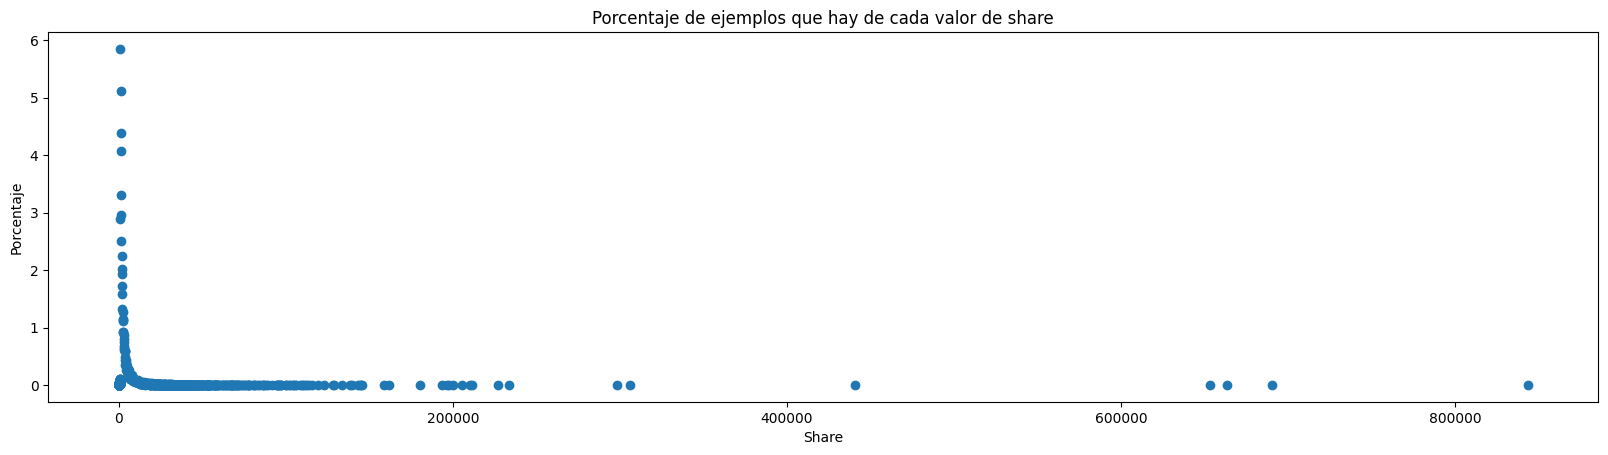

In [251]:

shares = np.unique(y_train)
repe_shares = np.zeros(shares.shape)

for i in range(shares.shape[0]):
  repe_shares[i] = np.count_nonzero(y_train.to_numpy() == shares[i])
porcentaje_shares = repe_shares * 100 / y_train.shape[0]
print('Rango de shares: [', shares.min(), ', ', shares.max(), ']. En total: ', shares.max()-shares.min())
print('menor número de repeticiones: ', repe_shares.min(), ' mayor número de repeticiones: ', repe_shares.max())
print('menor porcentaje de repeticiones: ', porcentaje_shares.min(), ' mayor porcentaje de repeticiones: ', porcentaje_shares.max())
print()


fig, ax = plt.subplots()

ax.plot(shares, porcentaje_shares, 'o')
ax.set_title('Porcentaje de ejemplos que hay de cada valor de share')
ax.set_xlabel('Share')
ax.set_ylabel('Porcentaje');

fig.set_figwidth(20)  
fig.show()

Esta gráfica comienza a ser más interesante, como se puede observar, hay un claro desbalanceo, puesto que la mayoría de artículos tiene un share cercano a 0 mientras que si el share se hace más grande, ya comienza a haber menos artículos.

No obstante, antes de pensar en elminar las que están menos representadas, no se puede olvidar que estamos midiendo con share la popularidad de un artículo, y que como es natural, hay artículos "virales", que son de interés general y a la orden de el día, y artículos con muy poco impacto o un impacto normal, que son la mayoría de artículos.

Se va a optar por dejar todas las etiquetas y a continuación se explicará una técnica que si puede ser de mucho interés aplicarla para el problema que nos compete.

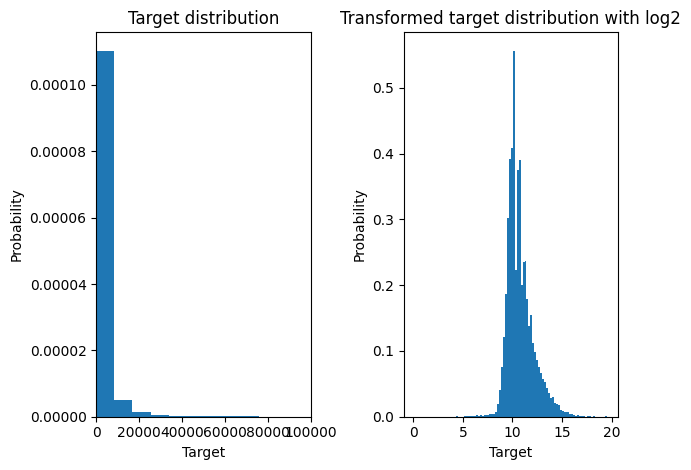

In [252]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

f, (ax0, ax1) = plt.subplots(1, 2)

ax0.hist(y_train, bins=100, density=True)
ax0.set_xlim([0, 100000])
ax0.set_ylabel("Probability")
ax0.set_xlabel("Target")
ax0.set_title("Target distribution")

ax1.hist(np.log2(y_train), bins=100, density=True)
ax1.set_ylabel("Probability")
ax1.set_xlabel("Target")
ax1.set_title("Transformed target distribution with log2")

plt.tight_layout()



Las etiquetas, como se puede observar en la gráfica de la izquierda, siguen una distribución logarítmica normal. Una forma de eliminar esta asimetría de los datos y hacerlo una distribución normal es aplicando logaritmo (en este caso, se ha aplicado logaritmo en base 2, pero se podría haber aplicado cualquier otro). Como se puede ver en la derecha, al aplicar logaritmo, la distribución de las etiquetas se volvería más normal, siguiendo una curva de campana. Considero que con esta transformación, no estaría adaptando mi problema a los datos de train, dado que lo más lógico es que para cualquier conjunto aleatorio de shares, haya muchos más artículos con valores bajos que altos (los más virales). Además, echando un vistazo rápido por internet, hay bastantes casos donde se aplica esto.

No obstante, tampoco se aplicará esta técnica, ya que en cross validation, cuando se aplicaba, se daban bastantes errores de desbordamiento. Por razones de tiempo, me veo obligado a seguir con las etiquetas como están, aunque se podría haber probado esta técnica con otros tipos de normalizaciones en los datos, por ejemplo.

Rango de shares: [ 0.0 ,  19.685686428876224 ]. En total:  19.685686428876224
menor número de repeticiones:  0.0  mayor número de repeticiones:  1.0
menor porcentaje de repeticiones:  0.0  mayor porcentaje de repeticiones:  0.003363266404331887



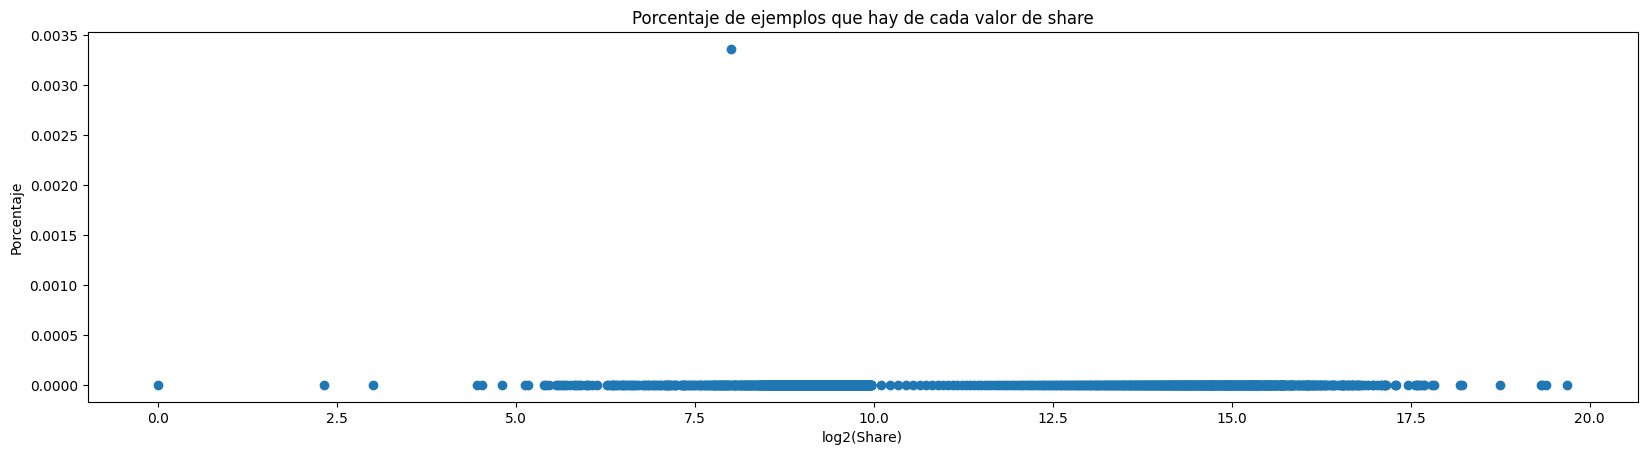

In [253]:
shares = np.unique(np.log2(y_train))
repe_shares = np.zeros(shares.shape)

for i in range(shares.shape[0]):
  repe_shares[i] = np.count_nonzero(y_train.to_numpy() == shares[i])
porcentaje_shares = repe_shares * 100 / y_train.shape[0]
print('Rango de shares: [', shares.min(), ', ', shares.max(), ']. En total: ', shares.max()-shares.min())
print('menor número de repeticiones: ', repe_shares.min(), ' mayor número de repeticiones: ', repe_shares.max())
print('menor porcentaje de repeticiones: ', porcentaje_shares.min(), ' mayor porcentaje de repeticiones: ', porcentaje_shares.max())
print()


fig, ax = plt.subplots()

ax.plot(shares, porcentaje_shares, 'o')
ax.set_title('Porcentaje de ejemplos que hay de cada valor de share')
ax.set_xlabel('log2(Share)')
ax.set_ylabel('Porcentaje');

fig.set_figwidth(20)  
fig.show()

Tras la transformación de las etiquetas, se puede observar claramente como hay menos desbalanceo y todo parece indicar que los datos son mejores ahora que antes para abordar un problema de regresión. No obstante, recalco lo que ya he dicho antes, se probó, y se presentaban numerosos errores de desbordamiento al deshacer el cambio con las etiquetas predichas en cross_validation.

A continuación, se graficará la media y la desviación de cada uno de los atributos.

In [254]:
means = np.empty(X_train.shape[1])
mins = np.empty(X_train.shape[1])
maxs = np.empty(X_train.shape[1])
desvs = np.empty(X_train.shape[1])
for i in range(X_train.shape[1]):
  means[i] = X_train.iloc[:,i].mean()
  mins[i] = X_train.iloc[:,i].min()
  maxs[i] = X_train.iloc[:,i].max()
  desvs[i] = X_train.iloc[:,i].std()
x = np.arange(1,X_train.shape[1]+1)

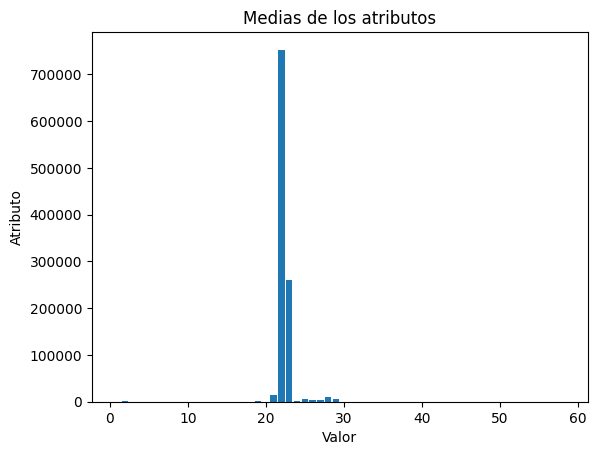

In [255]:
fig, ax = plt.subplots()

ax.bar(x,means)
ax.set_title('Medias de los atributos')
ax.set_xlabel('Valor')
ax.set_ylabel('Atributo');

fig.show()

In [256]:
np.abs(means).min()

0.01656106330014327

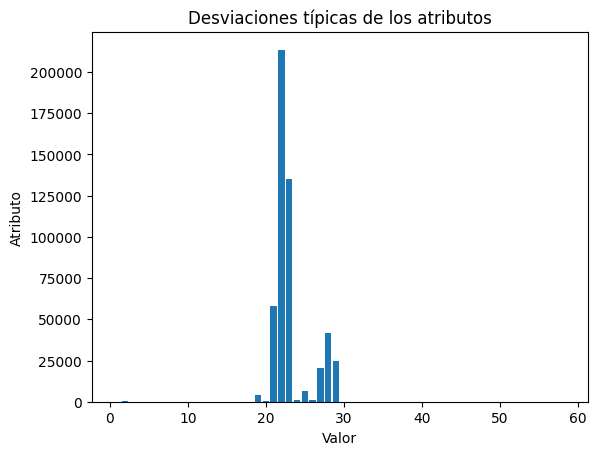

In [257]:
fig, ax = plt.subplots()

ax.bar(x,desvs)
ax.set_title('Desviaciones típicas de los atributos')
ax.set_xlabel('Valor')
ax.set_ylabel('Atributo');

fig.show()

In [258]:
desvs.min()

0.010678507387580196

Se puede observar que en algunos de los atributos, las medias y las desviaciones típicas son bastante bajas. Esto nos puede hacer pensar, que hay muchas características que no va a ser necesario normalizar. En parte sí y en parte no.

El dataset se compone de características numéricas, pero hay algunas que vienen ya acotadas entre 0 y 1. En este caso, como aunque eso pase, la media puede no ser exactamente 0 y la desviación no estar tan cerca de 1, se normalizarán también.

Pero hay otras características que son binarias. En este caso, no tiene mucho sentido normalizarlas, ya que estamos indicando la presencia o no de algo. Por tanto, a la hora de normalizar, se dejarán las columnas representadas únicamente por 0 y 1 y se normalizarán las demás para que tengan desviación típica 1 y media 0 y dejaremos a PCA hacer el trabajo de quitar las columnas que considere.

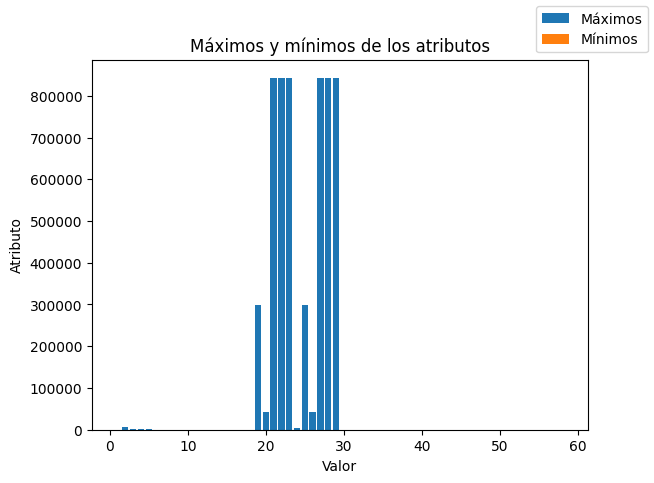

In [259]:
fig, ax = plt.subplots()

ax.bar(x , maxs, label='Máximos')
ax.bar(x , mins, label='Mínimos')
ax.set_title('Máximos y mínimos de los atributos')
ax.set_xlabel('Valor')
ax.set_ylabel('Atributo');

fig.legend()
fig.show()

In [260]:
(maxs - mins).min()

0.136929460581

Hay valores que parece que tienen un rango muy pequeño en la gráfica. Esto es porque hay muchas de las características que están acotadas entre 0 y 1 o que son binarias. Además hay que recordar que el rango de valores es algo relativo a las unidades de la propia variable, es decir, que aunque todos los valores sean cercanos a 0, no significa que la calidad de lo que están mostrando sea más baja.

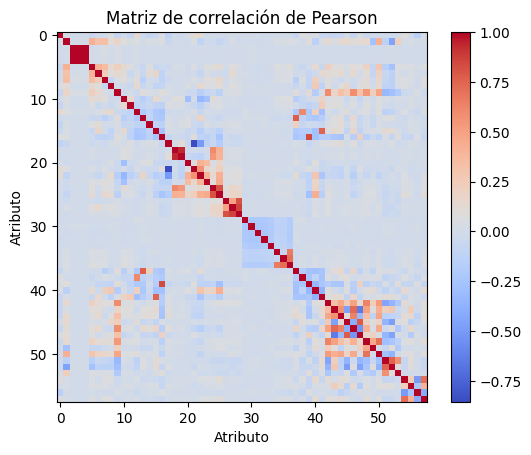

In [261]:
corr = X_train.corr()

fig, ax = plt.subplots()

s = ax.imshow(corr, cmap ="coolwarm")
ax.set_title('Matriz de correlación de Pearson')
ax.set_xlabel('Atributo')
ax.set_ylabel('Atributo');

fig.colorbar(s)
plt.show()

Se muestra la matriz de correlación de Pearson (que es la que viene con Pandas), aunque serviría cualquier matriz de correlación.

Como se puede observar, hay zonas con color rojizo intenso donde ser ve que las características están correlacionadas. 

Sería intersante eliminar alguno de estos atributos correlacionados, pues está altamente representado por otro. No obstante, de eso se encargará PCA.

#### <font color='blue'>2)  Identificar qué conjuntos de hipótesis se emplearán y justificar dicha elección. 0.25 puntos. 

Para esta práctica, solo tenemos para elegir entre los 4 modelos lineales que hemos visto: Regresión Lineal, Regresión Logística, PLA y PLA+Pocket. Se podrían usar otros como SVM, pero por cuestiones de tiempo la práctica se centrará en el uso de un modelo lineal.

  Estamos ante un problema de regresión, por lo que es automático descartar la Regresión Logística, PLA y PLA+Pocket, pues son todos algoritmos de clasificación.
  Por otra parte, la Regresión Lineal, como su nombre indica, es un buen algoritmo de regresión, que nos da lo que necesitamos para este problema: un algoritmo que pueda estimar una salida numérica en función de los datos.
  
Así que nos quedamos con Regresión Lineal.

#### <font color='blue'>3)  Si la base de datos define conjuntos de training y test, únalos en un solo conjunto y genere sus propios conjuntos. Describa y justifique el mecanismo de partición. 0.75 puntos. 

Ya he dividido los conjuntos de entrenamiento y prueba por motivos de seguridad. Ahora me dispongo a preparar mi conjunto de entrenamiento utilizando un enfoque de validación cruzada de 5 pliegues.

En este enfoque, dividiré el conjunto de ejemplos en 5 grupos y realizaré 5 pruebas de entrenamiento, utilizando 4 de los 5 conjuntos, y validación con el conjunto restante. Además, para evitar un desequilibrio aleatorio, distribuiré las clases de manera equitativa entre los pliegues.

Al emplear este método, obtendré 5 medidas de error para cada algoritmo utilizado, lo cual me permitirá estimar la calidad de dicho algoritmo en la clasificación.

La validación es importante debido a que existe la posibilidad de que algún algoritmo tenga mucha suerte y encuentre una forma muy efectiva de clasificar los datos de entrenamiento, pero que, en realidad, sea ineficiente para el conjunto de prueba. ¿Por qué utilizamos 5 validaciones?

La razón es que, como mencioné anteriormente, el azar puede ser impredecible y proporcionarnos resultados de validación que no reflejen el verdadero potencial del algoritmo. Para aumentar nuestra confianza en los resultados del algoritmo, realizamos múltiples divisiones y entrenamos en cada una de ellas. De esta manera, en lugar de obtener un único resultado de validación, obtenemos un promedio de varios resultados, lo cual es mucho más confiable.

El principal inconveniente de este sistema es que reduce el tamaño del conjunto de datos utilizado para el entrenamiento y validación, pero dado que tenemos un conjunto de datos enorme, podemos permitirnos este sacrificio sin problemas.

In [262]:
#5-fold cross validation
particiones = np.empty((5),list)

train_data = X_train.to_numpy()
train_labels = y_train.to_numpy()

index_train = np.arange(len(train_labels))

for i in range(5):
  particiones[i] = []

#En vez de tener varios conjuntos de datos, usaremos conjuntos de índices, que son mucho más cómodos de manejar
for i in range(index_train.shape[0]):
  particiones[i%5].append(index_train[i])
  
for i in range(5):
  particiones[i] = np.asarray(particiones[i])
  np.random.shuffle(particiones[i])

training1 = np.concatenate((particiones[0],particiones[1],particiones[2],particiones[3]))
test1 = particiones[4]

training2 = np.concatenate((particiones[4],particiones[0],particiones[1],particiones[2]))
test2 = particiones[3]

training3 = np.concatenate((particiones[3],particiones[4],particiones[0],particiones[1]))
test3 = particiones[2]

training4 = np.concatenate((particiones[2],particiones[3],particiones[4],particiones[0]))
test4 = particiones[1]

training5 = np.concatenate((particiones[1],particiones[2],particiones[3],particiones[4]))
test5 = particiones[0]

cv_trains = [training1,training2,training3,training4,training5]
cv_tests = [test1,test2,test3,test4,test5]


#### <font color='blue'>4)  Justifique todos los detalles del preprocesado de los datos (codificación, transformación, normalización, etc). Es decir, todas las manipulaciones sobre los datos iniciales que nos permitan fijar el conjunto de vectores de características que se usarán en el entrenamiento. 1 punto.  

<font color='blue'>Nota: Las transformaciones no-lineales de las variables pueden definirse a partir de las potencias y
productos de potencias de las variables originales, conjuntos de polinomios ortogonales, etc. Si se
usan transformaciones no polinómicas de las variable como $log$, $\sqrt{()}$, $sin$, etc, debe justificar el
interés de las mismas. 

Aunque lo idóneo sería hacer el preprocesado antes de dividir el conjunto de train con Cross Validation (para evitar tener que hacerlo múltiples veces), he preferido hacerlo a continuación para mantenerme en linea con los enunciados de la práctica. Por otra parte, como he decidido hacer la partición por índices (en vez de crear distintos conjuntos de ejemplos para cada particion), puedo modificar directamente el conjunto train y se modificarán las correspondientes particiones sin problemas.

NORMALIZACIÓN



Los datos serán normalizados. Esto suele ser una buena práctica para acelerar el entrenamiento (es más facil operar con valores pequeños y semejantes que con valores muy extremos e indistintos en función de la variable). Además de que hay técnicas que se ven influenciadas por la escala de las variables, por lo que en general es buena idea mantenerlas en la misma escala todas.

Además, almacenaré estos valores en variables para poder volver a normalizar luego los datos del conjunto Test respecto a estos mismos valores. Esto último es necesario pues, si hemos entrenado nuestro modelo con una escala concreta, también deberíamos clasificar con una escala. Al fin y al cabo, esa es la escala en la que el algoritmo ha aprendido a clasificar, y que no sea exactamente la misma podría empeorar la clasificación.

Normalizaré respecto a la media y la desviación típica, de forma que todos los valores tengan misma media (de 0) y desviación típica (de 1)

Para facilitar la normalización, voy a almacenar las medias y desviaciones de los datos numéricos, aunque no sepa aún si los voy a terminar usando o no.

Las columnas binarias no se normalizan, ya que indican la presencia o no de algo y ya están en un rango acotado. Las columnas que son un rango, entre 0 y 1, si se van a normalizar para que tengan la misma desviación típica que las demás. Como se podrá observar tras normalizar, las únicas desviaciones típicas que no serán 1 serán las de las variables binarias. Pero esto no es perjudicial, se normaliza para que todas las variables estén en los mismos rangos y para agilizar el entrenamiento.


In [263]:
pd_means = X_train.mean()
pd_stds = X_train.std()
print('\tMedias:\n', pd_means)
print('\tDesviaciones típicas:\n', pd_stds)

	Medias:
 2         10.395991
3        545.086369
4          0.553978
5          1.004675
6          0.694197
7         10.889651
8          3.302459
9          4.559547
10         1.242626
11         4.546375
12         7.232200
13         0.053207
14         0.178892
15         0.156661
16         0.059160
17         0.184879
18         0.211684
19        25.874315
20      1147.380484
21       311.920104
22     13581.755188
23    752734.244779
24    259242.373681
25      1115.815671
26      5662.495969
27      3138.259500
28      4031.395087
29     10422.915770
30      6472.944252
31         0.169710
32         0.187132
33         0.186762
34         0.182524
35         0.142569
36         0.061682
37         0.069620
38         0.131302
39         0.184819
40         0.141478
41         0.216059
42         0.223622
43         0.233988
44         0.443180
45         0.119242
46         0.039550
47         0.016561
48         0.681530
49         0.287999
50         0.353716
51        

Como no hay ninguna varianza que sea 0 (es decir, una colunmna con un dato constante), eliminar columnas con valor cercano a 0 significaría perder información en algunos casos, puesto que no podemos saber a ciencia cierta que umbral de decisión escoger.

In [264]:
# from sklearn import datasets
# from sklearn.feature_selection import VarianceThreshold

# thresholder = VarianceThreshold(threshold=1000)

# X_train = thresholder.fit_transform(X_train)
# X_train = pd.DataFrame(X_train)
# print(X_train)
# pd_means = X_train.mean()
# pd_stds = X_train.std()
for i in X_train.columns:
  #Si la columna es binaria, no se hace nada
  if all(elem in [0, 1] for elem in X_train[i]):
    pass
  else:
    X_train[i] = (X_train[i]-pd_means[i])/pd_stds[i]
  # X_train[i] = (X_train[i]-pd_means[i])/pd_stds[i]

# for i in X_train.columns:
#   if all(elem in [0, 1] for elem in X_train[i]):
#     pass
#   else:
#     X_train[i] = (X_train[i]-X_train[i].min())/(X_train[i].max() - X_train[i].min())
#     X_train[i] = X_train[i] * (1-0)+0
#   # X_train[i] = (X_train[i]-pd_means[i])/pd_stds[i]
X_train

,2,3,4,5,6,7,8,9,10,11,...,50,51,52,53,54,55,56,57,58,59
4131,-0.659900,-0.481938,0.002967,-0.000774,-0.006458,-0.612123,-0.335259,-0.428137,-0.304317,0.830179,...,-0.225743,0.893072,-1.030171,0.161382,0.415712,0.077525,2.226810,-0.268599,0.837064,-0.690264
32028,1.703654,-0.126511,-0.007689,-0.000774,0.004203,-0.523276,0.179551,-0.428137,-0.304317,0.030120,...,-0.190621,0.061143,0.580604,-1.409921,-1.651549,0.077525,-0.868155,-0.268599,0.837064,-0.690264
30762,1.230943,-0.612546,0.010358,-0.000774,0.024019,-0.612123,-0.335259,-0.428137,-0.304317,0.619018,...,1.451889,0.061143,0.580604,1.149168,1.363206,0.077525,0.404219,1.689960,-1.339275,1.608123
10452,-1.605321,-0.426268,0.003576,-0.000774,0.006045,0.098651,-0.335259,-0.428137,-0.304317,0.600746,...,-0.489417,0.061143,0.580604,0.249525,0.415712,-0.185466,0.538647,0.248323,-1.569208,-0.083652
13037,-1.132611,-0.811671,0.032456,-0.000774,0.031572,-0.523276,-0.592665,-0.548415,-0.304317,-0.012017,...,0.753300,0.061143,-0.023437,2.030166,1.793886,1.129489,-0.868155,-0.268599,0.837064,-0.690264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27283,0.285522,0.789890,-0.018190,-0.000774,-0.017655,4.540988,0.436956,5.706061,-0.304317,0.589395,...,-0.007674,-0.632131,0.983298,-0.881720,-1.651549,0.603507,0.369831,-1.784902,-1.280455,1.089132
579,-0.187189,-0.848070,0.042034,-0.000774,0.050988,-0.878663,-0.850070,-0.548415,-0.304317,0.256925,...,0.529786,1.447691,-0.627478,0.811996,1.104799,0.077525,0.060334,-0.268599,-0.751076,-0.690264
38617,0.285522,-0.261402,-0.013572,-0.000774,-0.015069,-0.612123,-0.592665,-0.187580,-0.304317,0.507855,...,-0.639549,-0.458813,-0.627478,0.463947,0.071168,0.603507,-0.868155,-0.268599,0.837064,-0.690264
2440,1.230943,-0.518337,0.009314,-0.000774,-0.014886,0.542885,0.179551,-0.428137,-0.304317,0.718930,...,-0.205231,0.061143,-0.023437,-1.885381,0.071168,-4.130332,0.988824,1.247705,-1.280455,1.089132


In [265]:
pd_means = X_train.mean()
pd_stds = X_train.std()
print('\tMedias:\n', pd_means)
print('\tDesviaciones típicas:\n', pd_stds)

	Medias:
 2    -3.637191e-16
3    -1.433847e-17
4    -1.027590e-17
5     4.540515e-18
6     1.421898e-17
7    -9.989132e-17
8     4.946771e-17
9    -2.915488e-17
10    1.481642e-17
11   -6.889633e-16
12   -1.634585e-16
13    5.320687e-02
14    1.788921e-01
15    1.566609e-01
16    5.915986e-02
17    1.848788e-01
18    2.116840e-01
19    1.911796e-18
20   -4.122309e-18
21   -3.584617e-18
22   -1.672821e-17
23   -1.211600e-16
24    1.873560e-16
25    2.724309e-17
26    1.558113e-16
27   -1.644144e-16
28   -3.345642e-18
29   -4.468822e-17
30    4.779489e-19
31    1.697104e-01
32    1.871321e-01
33    1.867622e-01
34    1.825245e-01
35    1.425689e-01
36    6.168231e-02
37    6.961961e-02
38    1.313019e-01
39   -1.386052e-17
40   -9.272209e-17
41    1.046708e-16
42   -9.081029e-18
43   -6.500105e-17
44   -4.038668e-17
45    5.448617e-17
46   -1.092113e-16
47   -5.496412e-18
48   -7.981747e-17
49    1.271344e-16
50   -1.889093e-16
51   -1.749293e-16
52    2.024114e-16
53   -1.657288e-16
54

Ahora seria el momento de aplicar alguna técnica de eliminación de Outliers, y para ello se usará LocalOutlierFactor.

LocalOutlierFactor (LOF) es un algoritmo de detección de anomalías utilizado en aprendizaje automático. Su objetivo principal es identificar puntos de datos atípicos o "anómalos" en un conjunto de datos. LOF se basa en la suposición de que los puntos anómalos tienen una densidad de vecinos significativamente menor en comparación con los puntos normales en su vecindario local.

En esta práctica, se ha decidido no aplicar ningún método de eliminación de outliers por el hecho de que no existen como tal. Al estar representándose la popularidad de ciertos artículos de una página web no podemos prescindir de datos anómalos, ya que, pueden ser no anómalos.

In [266]:
# ###OUTLIERS
# from sklearn.neighbors import LocalOutlierFactor
# # # identify outliers in the training dataset
# datos_antes = X_train.shape[0]

# X_train = X_train.to_numpy()
# y_train = y_train.to_numpy()
# lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# yhat = lof.fit_predict(X_train)
# mask = yhat != -1
# X_train, y_train = X_train[mask, :], y_train[mask]

# X_train = pd.DataFrame(X_train)
# y_train = pd.DataFrame(y_train)

# datos_despues = X_train.shape[0]

# print(datos_antes-datos_despues, datos_antes, datos_despues)
# print("Datos eliminados por LOF: ", (datos_antes-datos_despues)/datos_antes*100, "%")
# ##Se repite CV-5
# #5-fold cross validation
# particiones = np.empty((5),list)

# train_data = X_train.to_numpy()
# train_labels = y_train.to_numpy()

# index_train = np.arange(len(train_labels))

# for i in range(5):
#   particiones[i] = []

# #En vez de tener varios conjuntos de datos, usaremos conjuntos de índices, que son mucho más cómodos de manejar
# for i in range(index_train.shape[0]):
#   particiones[i%5].append(index_train[i])
  
# for i in range(5):
#   particiones[i] = np.asarray(particiones[i])
#   np.random.shuffle(particiones[i])

# training1 = np.concatenate((particiones[0],particiones[1],particiones[2],particiones[3]))
# test1 = particiones[4]

# training2 = np.concatenate((particiones[4],particiones[0],particiones[1],particiones[2]))
# test2 = particiones[3]

# training3 = np.concatenate((particiones[3],particiones[4],particiones[0],particiones[1]))
# test3 = particiones[2]

# training4 = np.concatenate((particiones[2],particiones[3],particiones[4],particiones[0]))
# test4 = particiones[1]

# training5 = np.concatenate((particiones[1],particiones[2],particiones[3],particiones[4]))
# test5 = particiones[0]

# cv_trains = [training1,training2,training3,training4,training5]
# cv_tests = [test1,test2,test3,test4,test5]

PCA

PCA (Principal Component Analysis) es un algoritmo estadístico ampliamente utilizado para reducir la dimensionalidad de un conjunto de datos mientras se conserva la mayor cantidad posible de información. Su objetivo es encontrar nuevas variables, llamadas componentes principales, que sean combinaciones lineales de las variables originales.

En la implementación de PCA en la biblioteca scikit-learn (sklearn), se considera como un algoritmo de aprendizaje, pero en realidad no realiza un aprendizaje en el sentido tradicional. En su lugar, se utiliza el conjunto de datos de entrenamiento para calcular los componentes principales, y luego se puede aplicar la misma transformación a otros conjuntos de datos, como los conjuntos de datos de prueba.

Al aplicar PCA, obtenemos un nuevo conjunto de datos que tiene menos dimensiones que el conjunto de datos original. Esto se logra al eliminar las dimensiones que tienen menos variabilidad o contribuyen menos a la estructura global de los datos. Sin embargo, es importante destacar que PCA no garantiza que no se pierda información en el proceso de reducción de dimensionalidad, pero intenta minimizar dicha pérdida.

Si deseamos especificar cuántas dimensiones queremos en el conjunto de datos transformado, podemos indicar el número deseado al aplicar PCA. De lo contrario, PCA calculará automáticamente el número de dimensiones necesarias para mantener la mayor cantidad de información posible.

Además, PCA también permite realizar una transformación inversa, lo que significa que podemos recuperar los datos originales (o al menos una aproximación cercana) a partir del conjunto de datos transformado. Esto es útil si queremos interpretar o visualizar los datos en su forma original después de reducir la dimensionalidad.

En resumen, PCA es un algoritmo que reduce la dimensionalidad de un conjunto de datos al encontrar combinaciones lineales de las variables originales. Aunque intenta minimizar la pérdida de información, es importante tener en cuenta que existe una pérdida inherente al reducir las dimensiones. Sin embargo, PCA proporciona una herramienta útil para explorar y analizar conjuntos de datos complejos.

In [267]:
from sklearn.decomposition import PCA

modelo_pca = PCA().fit(X_train)
datos = X_train

Al entrenar el modelo PCA, aseguramos que se conserve la mayor cantidad posible de información del conjunto de datos original. Luego, podemos examinar los componentes resultantes y clasificarlos según su contribución al total de la información contenida en los datos. Esta contribución se representa mediante el concepto de "porcentaje de varianza explicada acumulada".

El porcentaje de varianza explicada acumulada es una medida que indica el porcentaje de información que se conserva si utilizamos los 'n' componentes más importantes en lugar de todas las variables originales. En otras palabras, representa qué proporción de la variabilidad de los datos se captura al considerar solo los 'n' componentes más significativos.

Al observar la curva de porcentaje de varianza explicada acumulada, podemos evaluar cómo se reduce la pérdida de información a medida que aumentamos el número de componentes considerados. Si seleccionamos un número suficiente de componentes con alta varianza explicada, podemos mantener una gran cantidad de información mientras reducimos la dimensionalidad del conjunto de datos.

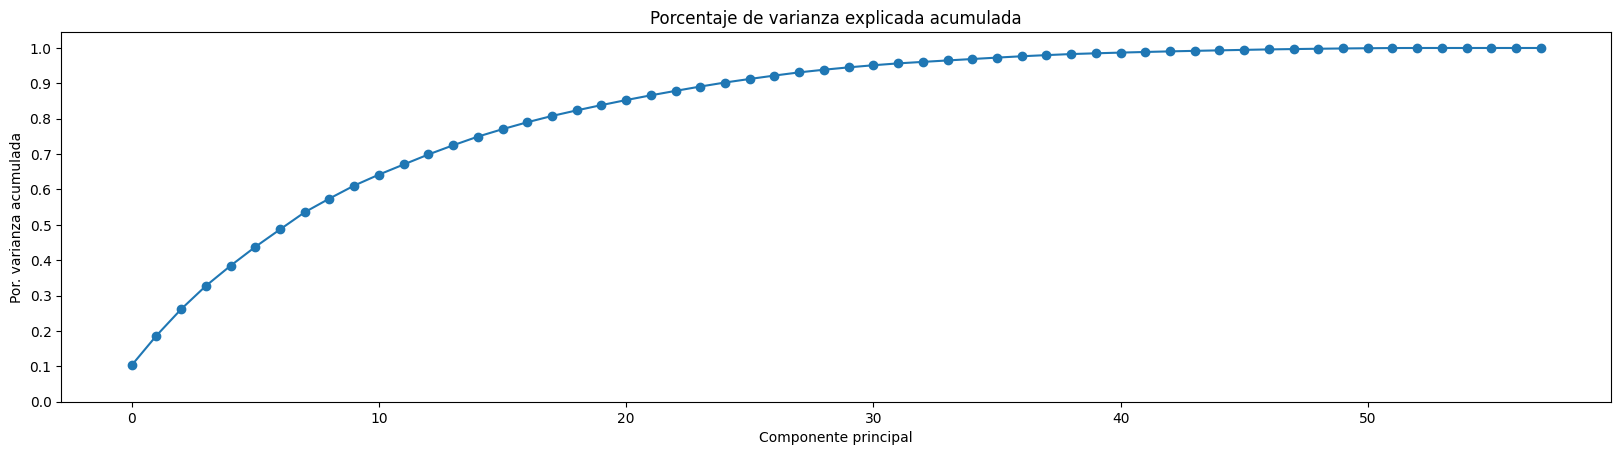

In [268]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots()
ax.plot(np.arange(len(datos.columns)),prop_varianza_acum,'-o')

fig.set_figwidth(20)  
ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

A continuación, se muestran distintos percentiles, para ver que configuración interesa más.

In [269]:
percentil90 = np.where(prop_varianza_acum >= 0.90)[0][0]
print('90% de la información mantenida con ', percentil90, ' componentes')
percentil95 = np.where(prop_varianza_acum >= 0.95)[0][0]
print('95% de la información mantenida con ', percentil95, ' componentes')
percentil99 = np.where(prop_varianza_acum >= 0.99)[0][0]
print('99% de la información mantenida con ', percentil99, ' componentes')

90% de la información mantenida con  24  componentes
95% de la información mantenida con  30  componentes
99% de la información mantenida con  42  componentes


Tras esta información, lo más lógico parece decantarse por los 30 componentes, ya que mantienen un porcentaje alto de información y se eliminan casi la mitad de las columnas con respecto al DataSet original. Sería interesante también rehacer el problema manteniendo el 99% de la información, pero se va a optar por mantener un 95%.

In [270]:
modelo_pca = PCA(n_components=percentil95).fit(X_train)
X_train = pd.DataFrame(modelo_pca.transform(X_train))

In [271]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,2.331075,1.182834,-4.106678,-0.107553,2.086526,-0.484677,-1.832388,1.513909,0.336655,0.248827,...,0.004634,0.671750,0.494315,0.313768,-0.718728,0.406209,0.536392,0.101942,0.479580,0.741230
1,-0.348492,0.928838,-1.313558,-0.038562,-0.569808,1.104517,-0.077718,-1.195198,0.703213,0.054394,...,-1.110868,0.660056,0.103645,0.329549,0.457847,-0.819831,-0.281971,-0.092971,-1.048903,0.030761
2,-1.182872,-2.566010,1.183731,-0.002983,-1.180329,-0.658450,-0.349300,1.244004,2.671810,-0.506605,...,0.216659,0.434540,-0.382617,0.711519,-0.136448,0.636701,0.214942,0.482686,-0.208280,-0.138031
3,-0.670387,-1.115316,0.398299,-0.005223,-0.010261,-0.536795,-0.233857,0.232793,1.258828,0.957807,...,1.069032,-0.873465,-0.888824,0.205898,0.223953,0.141799,0.250346,0.453882,0.593511,-0.819601
4,0.961438,-3.548333,1.145949,0.075139,-0.529414,1.622505,0.282581,-1.152940,0.425711,-1.143925,...,0.138470,0.202287,0.480518,0.621386,0.530783,0.204433,0.107058,-0.462536,-0.462700,-0.023012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29728,-1.950705,3.281302,-1.169537,0.138843,-1.569225,-1.691277,3.290997,-0.196763,-1.726780,0.213148,...,-0.339410,-1.832468,1.136887,-0.399590,-0.244157,0.857233,-0.380691,1.918195,-2.084528,-1.121296
29729,-0.428043,-3.685124,-0.881136,-0.041807,2.826057,-0.309560,-2.252661,1.581127,-1.206392,-0.958367,...,0.443618,-0.881796,-0.049581,0.316428,0.034018,-0.266732,0.096451,0.621535,0.281380,0.100642
29730,0.988973,-0.624467,0.079432,0.018250,0.054102,2.350588,0.542562,-0.199882,0.918089,-0.372232,...,0.107769,0.070864,1.281579,0.521411,0.411959,-0.571072,0.510025,-0.381211,-0.735919,0.375197
29731,-1.643801,-2.746467,-0.576575,-0.104655,2.135830,-1.531976,-2.287580,2.807664,-0.376482,-0.226844,...,0.202944,-0.619589,0.136810,-0.357891,0.010710,1.331406,0.104935,-0.208520,0.592987,-0.125815


A continuación, y ya para terminar con la manipulación de los datos originales, se aplicará logaritmo en base 2 a las etiquetas, tanto de train como de test (para que se pueda comparar todo). Hay que tener en cuenta, que en adelante, para mostrar las distintas métricas de error, habrá que hacer todo con la potencia de 2 de las etiquetas que tengamos o las que se hayan predicho, con objetivo de que sean las que había antes de la transformación. SE HA DESESTIMADO

In [272]:
# y_train = np.log2(y_train)
# y_train = pd.DataFrame(y_train)

# y_test = np.log2(y_test)
# y_test = pd.DataFrame(y_test)

#### <font color='blue'>5)  Justifique las métricas de error y la función de pérdida a usar. Discutir su idoneidad para el problema. 0.5 puntos. 

Como estamos ante un problema de regresión, queremos maximizar lo cerca que se ha estado de clasificar correctamente. Para ello, en este tipo de casos estadísticos la metrica que da mejores resultados es el error cuadrático medio.

In [273]:
from sklearn.metrics import mean_squared_error

Adicionalmente usaremos el accuracy, pero fácilmente podremos darnos de que 
esta medida no es muy buena para regresión y por qué.

In [274]:
from sklearn.metrics import accuracy_score

Todos los algoritmos consiguen un porcentaje de acierto pésimo. Esto tiene sentido, pues el accierto solo ocurre si el algoritmo atina exactamente con el valor de share. No obstante, aunque sería ideal, este no es el objetivo en los algoritmos de regresión. Nos interesa valorar, no solo si ha acertado o no (de hecho, esto no es muy importante), sino también valorar cómo de cerca han estado de acertar. Por ello, esta métrica no nos dice realmente nada útil sobre el algoritmo y no se usará.

El error cuadrático es útil como 'selector'. Es el más recomendado y usado para estos problemas, a nivel estadístico; y es el que se usa como función de pérdida en regresión. 

Por otra parte, no es muy intuitivo para nosotros. Una persona, por lo general, no es es capaz de interpretar intuitivamente qué nos está diciendo el error cuadrático medio.

Por ello, el error absoluto es una útil medida a añadir, para interpretar cómodamente los datos. Esta medida nos indicará de media, cuanto se aleja el algoritmo de acertar.

In [275]:
from sklearn.metrics import mean_absolute_error


#### <font color='blue'>6)  Discuta todos los parámetros y el tipo de regularización usada en el ajuste de los modelos seleccionados. Justificar la idoneidad de la regularización elegida. 1 punto. 

Para utilizar Regresión Lineal en sklearn, se ofrecen dos opciones: la implementación directa llamada "LinearRegression" y "SGDRegressor", que permite utilizar el algoritmo SGD (Descenso de Gradiente Estocástico). Estos modelos requieren ajustar los hiperparámetros para obtener el mejor rendimiento. La selección de los hiperparámetros puede realizarse mediante teoría o mediante una técnica llamada GridSearch.

En el caso de GridSearch, se prueban diferentes combinaciones de hiperparámetros y se selecciona la que proporciona el mejor desempeño. Sin embargo, aplicar GridSearch a todos los hiperparámetros es computacionalmente inviable debido al crecimiento exponencial del número de combinaciones posibles.

Como alternativa, existen dos enfoques adicionales. Uno consiste en seleccionar previamente ciertos hiperparámetros que se mantendrán iguales para todos los algoritmos en el GridSearch. Esto se basa en una pequeña batería experimental y permite mantener ciertos valores constantes en todas las pruebas. El segundo enfoque implica seleccionar los hiperparámetros después de realizar el GridSearch. Esto puede deberse a que los parámetros seleccionados no son significativos o porque hay demasiadas opciones para probar y sería inviable probarlas todas. Estos parámetros seleccionados posteriormente solo se aplicarán al algoritmo que se determine como el "mejor modelo".

Es importante tener en cuenta que los resultados pueden variar entre diferentes ejecuciones debido a la aleatoriedad inherente en el aprendizaje automático y a la proximidad de los resultados entre sí. Estas variaciones podrían no ser drásticas, pero pueden hacer que los resultados no sean completamente consistentes con los análisis previos realizados.

REGRESIÓN LINEAL

Antes de realizar el GridSearch, se prefijarán ciertos hiperparámetros en el algoritmo de Regresión Lineal. Estos hiperparámetros son los siguientes:

+ fit_intercept: Este hiperparámetro indica si se permite añadir una constante a la función de decisión. En la mayoría de los casos, es una buena práctica incluir esta constante, ya que brinda más flexibilidad al algoritmo. Es poco probable que sea perjudicial, ya que el algoritmo puede determinar que la constante es igual a cero si no es necesaria. Por lo tanto, se mantendrá el valor predeterminado, que es True.

+ normalize: Este hiperparámetro indica si el algoritmo normalizará los datos antes de entrenar. Sin embargo, dado que los datos ya se han normalizado previamente, no es necesario aplicar esta normalización nuevamente. Por lo tanto, se mantendrá el valor predeterminado, que es False.

+ copy_X: Este hiperparámetro indica si la matriz de características X se sobrescribirá (False) o se copiará en una nueva variable (True). En este caso, no es necesario sobrescribir X, por lo que se mantendrá el valor predeterminado (True).

+ n_jobs: Este hiperparámetro especifica el número de núcleos de la CPU que se utilizarán para paralelizar la ejecución del algoritmo. Establecerlo en -1 permitirá utilizar todos los núcleos disponibles en el sistema. Aunque en un problema de regresión lineal esto puede tener un impacto limitado en el rendimiento, no tiene efectos negativos y puede acelerar el proceso de entrenamiento.

+ positive: Este hiperparámetro indica si se fuerza a los coeficientes a ser positivos. En este caso, no hay ninguna razón para imponer esta restricción, por lo que se mantendrá el valor predeterminado, que es False.

Es importante destacar que el algoritmo de Regresión Lineal no tiene la mayoría de los atributos característicos de los algoritmos iterativos. Esto se debe a que utiliza la pseudoinversa para el entrenamiento, lo que simplifica su implementación y reduce la cantidad de hiperparámetros necesarios.

Además de la implementación básica de Regresión Lineal, existen otras variantes que añaden funcionalidad adicional, como Ridge (que agrega una regularización L2) y Lasso (que agrega una regularización L1). Explorar estas opciones y otras variantes puede ser interesante para ampliar las posibilidades y ajustar el modelo a diferentes necesidades.

In [276]:
from sklearn.linear_model import LinearRegression

REGRESIÓN LINEAL SGD

Antes de realizar el GridSearch, se prefijarán ciertos hiperparámetros en el algoritmo de Regresión Lineal utilizando SGD (Stochastic Gradient Descent). Estos hiperparámetros son los siguientes:

+ loss: Este hiperparámetro especifica la función de pérdida utilizada en el algoritmo. En nuestro caso, para realizar una regresión lineal, utilizaremos el error cuadrático (squared_error). Este es el valor predeterminado.

+ warm_start: Esta técnica consiste en reutilizar la solución de la llamada anterior como inicialización para la siguiente. Sin embargo, en nuestro caso, solo entrenaremos el modelo una vez, por lo que no es relevante. Se mantendrá el valor predeterminado, que es False.

+ shuffle: Indica si los datos deben ser reordenados después de cada época. Esta es una práctica común, y hemos utilizado esta técnica en implementaciones anteriores de SGD. Por lo tanto, se mantendrá en True, que es el valor predeterminado.

+ random_state: En caso de que shuffle sea True, este hiperparámetro indica la semilla utilizada para las reordenaciones aleatorias. En este caso, no nos importa la semilla específica, por lo que se mantendrá el valor predeterminado, que es None (generación aleatoria de la semilla).

+ verbose: Este hiperparámetro controla la cantidad de información que se muestra en el registro durante el entrenamiento. Como es principalmente informativo, se dejará en el valor predeterminado, que es 0.

+ epsilon: Este hiperparámetro se utiliza en funciones de pérdida epsilon-insensibles, que no es el caso en nuestro escenario de regresión lineal. Por lo tanto, no es relevante y se mantendrá en el valor predeterminado.

+ l1_ratio: Este hiperparámetro se refiere a la mezcla de regularización L1 y L2 en caso de utilizar la regularización "Elastic-Net". Como no vamos a utilizar esta regularización (no vista en teoría), se mantendrá en el valor predeterminado, que es 0.15.

+ fit_intercept: Indica si se permite añadir una constante a la función de decisión. En la mayoría de los casos, es una buena práctica incluir esta constante, ya que amplía las posibilidades del algoritmo. Se mantendrá en True, que es el valor predeterminado.

+ early_stopping: Este hiperparámetro se utiliza para detener el entrenamiento antes si la solución no mejora durante cierto número de épocas consecutivas. En nuestro caso, no necesitamos reducir el número de ejecuciones, ya que el entrenamiento no lleva mucho tiempo. Por lo tanto, se dejará en False, que es el valor predeterminado.

+ validation_fraction: Este hiperparámetro determina el porcentaje de datos que se utilizará para validación en caso de usar early_stopping. Como no utilizamos early_stopping, este valor no es relevante y se mantendrá en el valor predeterminado.

+ average: Indica si se debe almacenar la media de los pesos de todas las actualizaciones. No utilizaremos este valor en nuestro estudio, por lo que se mantendrá en el valor predeterminado.

Antes de realizar el GridSearch, se realizarán experimentos para elegir los siguientes hiperparámetros:

+ Tolerancia (tol): Este hiperparámetro establece el nivel de tolerancia en el cual se considera que la solución no ha empeorado. Se probarán diferentes valores para encontrar un punto en el que todos los modelos converjan y tengan un desempeño similar.

+ Número de iteraciones sin cambio (n_iter_no_change): Este hiperparámetro determina cuántas veces consecutivas la solución no debe mejorar para detener la ejecución. Se buscará un valor que permita que los modelos converjan adecuadamente sin detenerse prematuramente.

+ Número máximo de iteraciones (max_iter): Este hiperparámetro establece el número máximo de épocas o iteraciones que el algoritmo realizará durante el entrenamiento. Se explorarán diferentes valores para asegurarse de que todos los modelos tengan suficiente tiempo para converger.

Una vez completados estos experimentos, se realizará el GridSearch para explorar otros hiperparámetros:

+ Regularización (Penalty): Se probarán dos opciones, 'l1' y 'l2', para la regularización del modelo. La regularización 'elasticnet', que combina 'l1' y 'l2', no se considerará en esta práctica.

+ Factor de regularización (alpha): Este hiperparámetro controla la fuerza de la regularización. Se probarán tres valores: 10 (regularización alta), 0.01 (regularización baja) y posiblemente otros valores para explorar más opciones si se observa una diferencia notable en el desempeño.

+ Tasa de aprendizaje (Learning Rate): En este caso, se explorará la opción de mantener la tasa de aprendizaje constante (constant). Esto se debe a que explorar todas las combinaciones posibles de tasas de aprendizaje llevaría mucho tiempo. Sin embargo, después del GridSearch, se podrán probar diferentes combinaciones de tipos y valores de tasa de aprendizaje para mejorar aún más el rendimiento del modelo.

+ Eta0: Este parámetro específico de la tasa de aprendizaje constante indica el valor de la tasa de aprendizaje. Se probarán tres valores: 0.001 (bajo) y 1 (alto), y se puede realizar una exploración más detallada en ese rango si se observa una mejora significativa.

Después del GridSearch, se pueden realizar experimentos adicionales para explorar hiperparámetros relacionados con la tasa de aprendizaje, como los parámetros asociados al Learning Rate (eta0 y power_t), con el fin de mejorar aún más los resultados obtenidos.


In [277]:
from sklearn.linear_model import SGDRegressor

ANTES DEL GRIDSEARCH

In [278]:
#SE USA UNA PEQUEÑA BATERÍA EXPERIMENTAL PARA HACER LAS ELECCIONES
aux_train_data = X_train[:int(X_train.shape[0]*0.1)]
aux_train_labels = y_train[:int(X_train.shape[0]*0.1)]
aux_test_data = X_train[-int(X_train.shape[0]*0.1):-1]
aux_test_labels = y_train[-int(X_train.shape[0]*0.1):-1]

max_iter

In [279]:
w = SGDRegressor(max_iter=10000).fit(aux_train_data,aux_train_labels)
print(w.n_iter_)

6


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Converge en unas pocas iteraciones, así que el máximo en adelante se fijará a 100, lo cual parece suficiente.

In [280]:
max_iter = 100

tol

Ahora procederemos a encontrar el valor óptimo de tolerancia. Por lo general, a medida que disminuimos la tolerancia, es posible obtener mejores resultados, pero esto puede requerir más iteraciones del algoritmo. Sin embargo, existe un punto en el que reducir aún más la tolerancia no proporciona una mejora significativa en el desempeño del modelo. Nuestro objetivo es identificar ese punto óptimo de tolerancia en el que obtengamos un equilibrio entre el rendimiento del modelo y el número de iteraciones necesarias.

In [281]:
w = SGDRegressor(max_iter=max_iter, tol=0.001).fit(aux_train_data,aux_train_labels)

y_predicted = w.predict(aux_test_data)
print(aux_train_labels)
print("MSE: ", mean_squared_error(aux_test_labels, y_predicted))
print("MAE: ", mean_absolute_error(aux_test_labels,y_predicted))
# print("Accuracy: ", accuracy_score(aux_test_labels, np.round(y_predicted)))


           60
4131   1700.0
32028  1100.0
30762  1700.0
10452  1200.0
13037   447.0
...       ...
38139  4600.0
8748   4300.0
11760   960.0
27171  2700.0
5652   2700.0

[2973 rows x 1 columns]
MSE:  9.565587895967068e+18
MAE:  2379475477.470834


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Esta tolerancia anterior es la predeterminada por sklearn.

In [282]:
w = SGDRegressor(max_iter=max_iter, tol=100).fit(aux_train_data,aux_train_labels)
y_predicted = w.predict(aux_test_data)
print("MSE: ", mean_squared_error(aux_test_labels, y_predicted))
print("MAE: ", mean_absolute_error(aux_test_labels,y_predicted))
# print("Accuracy: ", accuracy_score(aux_test_labels, np.round(y_predicted)))

MSE:  1.878012518614532e+19
MAE:  3416843857.6857567


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Como se puede observar anteriormente, incluso con una tolerancia extremadamente alta, los resultados obtenidos son prácticamente idénticos. Esto sugiere que nuestro problema de regresión converge muy rápidamente durante el entrenamiento del modelo. Hay varias posibilidades para esta rápida convergencia: podría ser debido a que la solución óptima es muy mala y se encuentra rápidamente, o puede ser que el problema en sí mismo sea relativamente fácil y la solución se encuentre fácilmente. La convergencia rápida puede ser una indicación tanto de la simplicidad del problema como de la eficacia del algoritmo de regresión lineal en este caso específico.

In [283]:
w = SGDRegressor(max_iter=max_iter, tol=0.00001).fit(aux_train_data,aux_train_labels)
y_predicted = w.predict(aux_test_data)
print("MSE: ", mean_squared_error(aux_test_labels, y_predicted))
print("MAE: ", mean_absolute_error(aux_test_labels,y_predicted))
# print("Accuracy: ", accuracy_score(aux_test_labels, np.round(y_predicted)))

MSE:  4.180693240748557e+18
MAE:  1558327714.5012126


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Al reducir drásticamente la tolerancia se ha determinado que el mejor valor posible ha sido 0.00001, así que en adelante se usará ese valor con SGDRegressor.

n_iter_no_change

Por último, vamos a modificar el número de iteraciones seguidas sin mejorar que necesita el algoritmo antes de detenerse. Al igual que con tolerancia, mientras mayor sea el valor mejores serán los resultados.

In [284]:
w = SGDRegressor(max_iter=max_iter, tol=0.00001, n_iter_no_change=5).fit(aux_train_data,aux_train_labels)
y_predicted = w.predict(aux_test_data)
print("MSE: ", mean_squared_error(aux_test_labels, y_predicted))
print("MAE: ", mean_absolute_error(aux_test_labels,y_predicted))
# print("Accuracy: ", accuracy_score(aux_test_labels, np.round(y_predicted)))

MSE:  3.141895218068177e+19
MAE:  4285974346.2870345


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


El anterior sería el predeterminado, que se toma como referencia.

In [285]:
w = SGDRegressor(max_iter=max_iter, tol=0.00001, n_iter_no_change=1).fit(aux_train_data,aux_train_labels)
y_predicted = w.predict(aux_test_data)
print("MSE: ", mean_squared_error(aux_test_labels, y_predicted))
print("MAE: ", mean_absolute_error(aux_test_labels,y_predicted))
# print("Accuracy: ", accuracy_score(aux_test_labels, np.round(y_predicted)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE:  243614171.0837953
MAE:  4475.278406376338


In [286]:
w = SGDRegressor(max_iter=max_iter, tol=0.00001, n_iter_no_change=100).fit(aux_train_data,aux_train_labels)
y_predicted = w.predict(aux_test_data)
print("MSE: ", mean_squared_error(aux_test_labels, y_predicted))
print("MAE: ", mean_absolute_error(aux_test_labels,y_predicted))
# print("Accuracy: ", accuracy_score(aux_test_labels, np.round(y_predicted)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


MSE:  1.813262010832432e+19
MAE:  3331145872.882326


El mejor resultado con diferencia se ha logrado al disminuir a 1 el parámetro, así que, en adelante, se usará este valor.

GRID SEARCH

Realizaré la ejecución de un 5CV (validación cruzada con 5 divisiones) para cada una de las combinaciones de hiperparámetros que hemos considerado. Sin embargo, en lugar de comparar uno a uno todos los algoritmos, optaré por seleccionar automáticamente el mejor modelo.

Es importante destacar que me habría gustado probar con más opciones de hiperparámetros, ya que explorar solo un par de valores para el learning rate y el factor de regularización limita la variedad de opciones. No obstante, debido a restricciones de tiempo y capacidad de cómputo, no ha sido posible ampliar el grid de búsqueda. En un escenario real, sería recomendable realizar un Gridsearch más exhaustivo.

El criterio de selección que utilizaré será el Mejor Error Absoluto Medio (MAE, por sus siglas en inglés). La justificación para elegir este criterio se explicará en el siguiente apartado.

In [287]:
best_MAE = np.inf
best_algoritmo = 'ERROR'

for num_algoritmo in range(9):
  MSE = 0
  accuracy = 0
  MAE = 0
  for i in range(5):
    train_x = X_train.iloc[cv_trains[i]].to_numpy()
    train_y = y_train.iloc[cv_trains[i]].to_numpy().flatten()
    test_x = X_train.iloc[cv_tests[i]].to_numpy()
    test_y = y_train.iloc[cv_tests[i]].to_numpy().flatten()

    if(num_algoritmo == 0): 
      w = LinearRegression(n_jobs=-1)
      algoritmo = 'LinearRegression'
    if(num_algoritmo == 1): 
      w = SGDRegressor(max_iter=100, penalty='l1', alpha=10, eta0=1, tol=0.00001, n_iter_no_change=1)
      algoritmo = 'SGDRegressor con l1, alpha=10, eta0=1'
    if(num_algoritmo == 2): 
      w = SGDRegressor(max_iter=100, penalty='l1', alpha=10, eta0=0.001, tol=0.00001, n_iter_no_change=1)
      algoritmo = 'SGDRegressor con l1, alpha=10, eta0=0.001'
    if(num_algoritmo == 3): 
      w = SGDRegressor(max_iter=100, penalty='l1', alpha=0.01, eta0=1, tol=0.00001, n_iter_no_change=1)
      algoritmo = 'SGDRegressor con l1, alpha=10, eta0=1'
    if(num_algoritmo == 4): 
      w = SGDRegressor(max_iter=100, penalty='l1', alpha=0.01, eta0=0.001, tol=0.00001, n_iter_no_change=1)
      algoritmo = 'SGDRegressor con l1, alpha=0.01, eta0=0.001'
    if(num_algoritmo == 5): 
      w = SGDRegressor(max_iter=100, penalty='l2', alpha=10, eta0=1, tol=0.00001, n_iter_no_change=1)
      algoritmo = 'SGDRegressor con l2, alpha=10, eta0=1'
    if(num_algoritmo == 6): 
      w = SGDRegressor(max_iter=100, penalty='l2', alpha=10, eta0=0.001, tol=0.00001, n_iter_no_change=1)
      algoritmo = 'SGDRegressor con l2, alpha=10, eta0=1'
    if(num_algoritmo == 7): 
      w = SGDRegressor(max_iter=100, penalty='l2', alpha=0.01, eta0=1, tol=0.00001, n_iter_no_change=1)
      algoritmo = 'SGDRegressor con l2, alpha=0.01, eta0=1'
    if(num_algoritmo == 8): 
      w = SGDRegressor(max_iter=100, penalty='l2', alpha=0.01, eta0=0.001, tol=0.00001, n_iter_no_change=1)
      algoritmo = 'SGDRegressor con l2, alpha=0.01, eta0=0.001'

    w = w.fit(train_x, train_y)
    y_predicted = w.predict(test_x)

  
    MSE += mean_squared_error(test_y,y_predicted)
    MAE += mean_absolute_error(test_y,y_predicted)
  
    
    # accuracy += accuracy_score(test_y, np.round(y_predicted))
  print('Algoritmo ', num_algoritmo, ' : ', algoritmo, '----------------')
  print("MSE medio: ", MSE/5)
  print("MAE medio: ", MAE/5)
  # print("Accuracy medio: ", accuracy/5)
  print()
  if  (MAE/5 < best_MAE):
      best_MAE = MAE/5
      best_algoritmo = algoritmo
print('El algoritmo que mejores resultados ha obtenido es el ', best_algoritmo, ', con un MAE de ', best_MAE)

Algoritmo  0  :  LinearRegression ----------------
MSE medio:  175291652.28869748
MAE medio:  3155.3115217612562

Algoritmo  1  :  SGDRegressor con l1, alpha=10, eta0=1 ----------------
MSE medio:  5.182198399458852e+24
MAE medio:  1033346629188.7542

Algoritmo  2  :  SGDRegressor con l1, alpha=10, eta0=0.001 ----------------
MSE medio:  141876223.99140057
MAE medio:  3114.8072758198214

Algoritmo  3  :  SGDRegressor con l1, alpha=10, eta0=1 ----------------
MSE medio:  2.786149642367774e+24
MAE medio:  918797199230.5238

Algoritmo  4  :  SGDRegressor con l1, alpha=0.01, eta0=0.001 ----------------
MSE medio:  142529815.305139
MAE medio:  3125.9338023333776

Algoritmo  5  :  SGDRegressor con l2, alpha=10, eta0=1 ----------------
MSE medio:  149873281.26092315
MAE medio:  3252.907384262555

Algoritmo  6  :  SGDRegressor con l2, alpha=10, eta0=1 ----------------
MSE medio:  143119526.2789718
MAE medio:  3183.9360177894637

Algoritmo  7  :  SGDRegressor con l2, alpha=0.01, eta0=1 --------

Efectivamente, al analizar los resultados obtenidos, podemos observar una gran variabilidad en función de los hiperparámetros elegidos. Encontramos resultados tanto muy malos como muy buenos.

En última instancia, el mejor desempeño lo ha brindado el modelo SGDRegressor, aunque su mejora respecto a los mejores resultados de LinearRegression es mínima.

Así que, por simplicidad del modelo, y por sus resultados prácticamente idénticos a SGD, se usará Regresión Lineal como hipótesis.

También es interesante notar que el tipo de regularización no ha tenido un impacto significativo en los resultados de este problema en particular.

Sin embargo, lo que parece ser determinante es el factor de regularización y el valor seleccionado para el learning rate. Por lo tanto, si decidimos continuar explorando con el SGDRegressor, sería recomendable experimentar con diferentes variaciones de estos parámetros para obtener un mejor rendimiento.

Procesado Post-Gridsearch

Como el algoritmo ganador, LinearRegression, no tiene parámetros a explorar en Post-Gridsearch, no será necesario hacer nada

#### <font color='blue'>7)  Selección de la mejor hipótesis para el problema. Discuta el enfoque seguido y el criterio de selección usado. ¿Cúal es su error $E_{out}$? 1 punto.



Para seleccionar la mejor hipótesis de entre todas las obtenidas, escogeré el que obtenga el mejor MAE promedio. Está claro que el MSE es una métrica importante, es la que se usa como función de pérdida. Pero si en última instancia lo que yo quiero es que el algoritmo acierte con la mayor precisión posible la fecha, la métrica que me interesa es cómo de lejos, de media, suele quedarse.

Además, el MSE, al ser cuadrático, está altamente influenciado por el desbalanceo y por los extremos con pocos ejemplos que, como ya hemos visto, abundan en este problema.

Así pues, usando MAE como criterio de selección, nos deberíamos quedar con SGD, pero dada la similitud con Regresión Lineal, se opta por esta última por el hecho de que hay mucha más simplicidad en los parámetros y en el algoritmo que implementa internamente..

Y ahora deberíamos de clasificar el conjunto de entrenamiento. No obstante, antes de eso no se nos debe olvidar que tenemos que hacerle las transformaciones que le hemos hecho anteriormente al conjunto test, para que nuestro algoritmo pueda actuar correctamente.


In [288]:
g = LinearRegression(n_jobs=-1)
g = g.fit(X_train, y_train)


for i in X_test.columns:
  X_test[i] = (X_test[i]-X_test[i].min())/(X_test[i].max() - X_test[i].min())
pd_final_test_data = pd.DataFrame(modelo_pca.transform(X_test))

In [289]:
labels_predicted = g.predict(pd_final_test_data)

MSE = mean_squared_error(y_test, labels_predicted)
MAE = mean_absolute_error(y_test, labels_predicted)

# accuracy = accuracy_score(y_test, np.round(labels_predicted))

print("-------------Resultados obtenidos:----------------")
print()
print("Error Cuadratico Medio: ", MSE)
print("Error Absoluto Medio: ", MAE)

-------------Resultados obtenidos:----------------

Error Cuadratico Medio:  108178335.00214256
Error Absoluto Medio:  3157.6925519238816





El Eout estimado con test es Eout = **108178347.67336743**.

Tenemos nuestros resultados finales y ahora nos interesa evaluar qué tan buenos son en comparación con los baselines. Los baselines son estimadores que utilizan heurísticas básicas para determinar cuán bien podríamos clasificar sin necesidad de entrenamiento. Dado que buscamos una referencia sencilla, no nos enfocaremos en heurísticas complejas, sino que optaremos por estimadores ingenuos. Estos estimadores utilizan métricas no muy complejas para proporcionar una estimación aceptable, como la media, la mediana y la moda.

Vamos a calcular los valores de MSE (Mean Squared Error) y MAE (Mean Absolute Error) para cada uno de estos estimadores y compararlos con nuestros resultados finales.


In [290]:
print("-------------Resultados obtenidos por nuestro clasificador:----------------")
print("Error Cuadratico Medio: ", MSE)
print("Error Absoluto Medio: ", MAE)
print()

labels_predicted = np.full(y_test.shape[0], y_train.mean())

MSE = mean_squared_error(y_test, labels_predicted)
MAE = mean_absolute_error(y_test, labels_predicted)

print("-------------Resultados obtenidos al clasificar con la media:----------------")
print("Error Cuadratico Medio: ", MSE)
print("Error Absoluto Medio: ", MAE)
print()


labels_predicted = np.full(y_test.shape[0], y_train.median())

MSE = mean_squared_error(y_test, labels_predicted)
MAE = mean_absolute_error(y_test, labels_predicted)

print("-------------Resultados obtenidos al clasificar con la mediana:----------------")
print("Error Cuadratico Medio: ", MSE)
print("Error Absoluto Medio: ", MAE)
print()

from scipy.stats import mode #La moda deberemos importarla de scipy porque numpy no la tiene implementada
labels_predicted = np.full(y_test.shape[0],mode(y_train)[0])

MSE = mean_squared_error(y_test, labels_predicted)
MAE = mean_absolute_error(y_test, labels_predicted)

print("-------------Resultados obtenidos al clasificar con la moda:----------------")
print("Error Cuadratico Medio: ", MSE)
print("Error Absoluto Medio: ", MAE)

-------------Resultados obtenidos por nuestro clasificador:----------------
Error Cuadratico Medio:  108178335.00214256
Error Absoluto Medio:  3157.6925519238816

-------------Resultados obtenidos al clasificar con la media:----------------
Error Cuadratico Medio:  108721491.93551712
Error Absoluto Medio:  3163.6282452521828

-------------Resultados obtenidos al clasificar con la mediana:----------------
Error Cuadratico Medio:  112533396.89143376
Error Absoluto Medio:  2411.5466653213603

-------------Resultados obtenidos al clasificar con la moda:----------------
Error Cuadratico Medio:  113795328.3816971
Error Absoluto Medio:  2458.7971950358187


<ipython-input-290-62958fcd00fd>:28: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels_predicted = np.full(y_test.shape[0],mode(y_train)[0])


Nuestro modelo es peor que todos los baselines en términos de MAE pero mejor en términos de MSE, lo que parece lógico, puesto que Regresión Lineal entrena buscando minimizar este.

Sin embargo, todo parece apuntar a que se ha ajustado un modelo pobre. La cuestión estaría en si los datos se han transformado adecuadamente o el dataset para este problema tiene la suficiente calidad. Además, tampoco se sabe si un MAE de 3000 dada la escala que presentan las etiquetas y lo dispersas que están (en el sentido de que la mayoría de artículos no tienen valores desmesurados de share) sería tan grave.

#### <font color='blue'>8)  Construya las curvas de aprendizaje del modelo, y discuta la calidad del ajuste obtenido a la vista de la conducta de dichas curvas. 0.5 puntos. 

Para los errores se considera MSE no MAE. Esto es más correcto a nivel teórico.

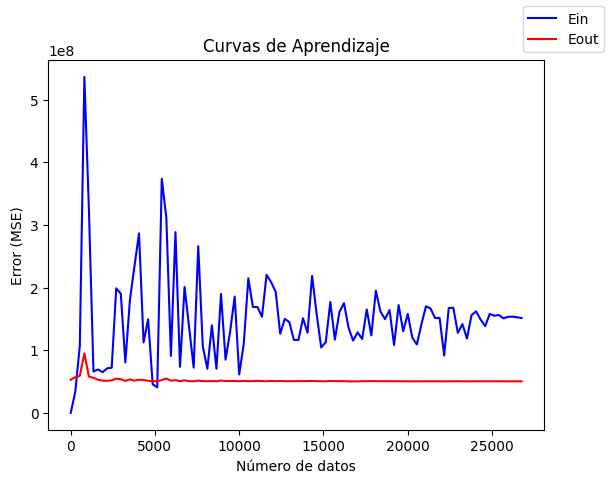

In [291]:
train_data = X_train.to_numpy()
train_labels = y_train.to_numpy().flatten()
indices = np.arange(train_data.shape[0])
np.random.shuffle(indices)

index_train = indices[int(len(indices)*0.1):]
index_test = indices[:int(len(indices)*0.1)]

curva_validacion_data = train_data[index_test]
curva_validacion_labels = train_labels[index_test]
curva_data = train_data[index_train]
curva_labels = train_labels[index_train]

eins = []
eouts = []
x = np.linspace(1, curva_data.shape[0],100)

indices = np.arange(curva_data.shape[0])
for num_datos in x:
  np.random.shuffle(indices)
  index_train = indices[:int(num_datos)]
  train_x = curva_data[index_train]
  train_y = curva_labels[index_train]

  w = LinearRegression(n_jobs=-1).fit(train_x, train_y)

  ein = mean_squared_error(train_y, w.predict(train_x))
  eout = mean_squared_error(curva_validacion_labels, w.predict(curva_validacion_data))

  eins.append(ein)
  eouts.append(eout)
  
fig, ax = plt.subplots()

ax.plot(x, eins, 'b-', label='Ein')
ax.plot(x, eouts, 'r-', label='Eout')
ax.set_title('Curvas de Aprendizaje')
ax.set_xlabel('Número de datos')
ax.set_ylabel('Error (MSE)');

fig.legend()
fig.show()

El ajuste tarda en converger, si se le puede considerar así, ya que hay una diferencia notable entre los MSE.

Lo que está claro, es que el modelo es de baja calidad y, claramente, en un problema donde se están manejando unos altos valores de share, un error en términos de MSE penaliza mucho. Además, todo parece indicar en que, según el análisis hecho, harían falta más datos para mejorar la calidad.

Lo que está claro es que en el artículo asociado a la web del dataset, se presenta este problema como una clasificación en distintas categorías de share según ciertos umbrales, por lo que parecería lógico abordar esta práctica como un problema de clasificación y una vez estuvieran claros las pretensiones de la empresa que nos lo haya encargado, emplear uno u otro y en caso de emplear regresión, intentar dar otro enfoque para mejorar.

#### <font color='blue'>9)  Suponga ahora que Ud. debe realizar este ajuste para una empresa que le ha proporcionado los datos, sin distinción entre training y test. ¿Cúal sería el mejor modelo que les propondría, y qué error  $E_{out}$ les diría que tiene? Justifique todas las decisiones. 0.5 puntos. 

Basándonos en el enfoque seguido en esta práctica, se ha realizado la selección del modelo considerado más apropiado. Para evaluar la capacidad de generalización de dicho modelo, se ha empleado la aproximación de Eout utilizando Etest, lo cual brinda una medida confiable. A pesar de que esta aproximación implica una reducción en el tamaño del conjunto de entrenamiento, no ha supuesto un problema debido a la abundancia de ejemplos disponibles.

Asimismo, se han considerado otras alternativas para obtener Eout, como emplear el conjunto de datos de entrenamiento (Ein) o calcular un promedio de los errores de validación (Ecv). Sin embargo, estas opciones no se acercan tanto a la obtención de Eout a partir de un conjunto de prueba lo suficientemente amplio. Estas prácticas suelen emplearse cuando los datos son escasos o valiosos, y no es factible destinar una parte del conjunto de entrenamiento para pruebas. En nuestro caso, esto no ha sido necesario.

Por otro lado, la validación cruzada nos permite probar y evaluar la calidad del modelo seleccionado, lo que resulta conveniente en la mayoría de los casos. Solo se puede obviar en situaciones en las que los tiempos de ejecución sean extremadamente largos, como horas o días, especialmente si los conjuntos de datos son lo suficientemente grandes como para obtener resultados confiables. A esto se le conoce como "hold-out".

La elección de cómo realizar la validación generalmente se reduce a seleccionar el número de particiones a utilizar. En general, la validación cruzada de 5 particiones (5-CV) es comúnmente utilizada debido a su fiabilidad demostrada a lo largo del tiempo y la experiencia acumulada. No obstante, siempre depende del conjunto de datos en cuestión, por lo que es necesario tener en cuenta algunos aspectos:

+ Menos particiones implican una menor seguridad obtenida y validaciones con conjuntos más pequeños. Por lo tanto, en conjuntos de datos relativamente grandes y costosos en términos de tiempo, a veces se opta por utilizar un 3-CV o incluso un 1-CV.

+ Por otro lado, utilizar más particiones aumenta la seguridad de que la calidad del modelo sea real y no simplemente producto de la aleatoriedad. Sin embargo, también se incrementa el tiempo de ejecución debido al mayor número de validaciones requeridas. Este enfoque suele emplearse cuando los conjuntos de datos son pequeños o cuando no se va a utilizar un conjunto de prueba, por lo que el cálculo de Eout se basará en Ecv. En casos extremos, se puede utilizar la técnica de "leave-one-out", donde se realizan tantas particiones como datos disponibles, entrenando en cada iteración con casi todos los datos y validando con un solo dato. Esta técnica se utiliza cuando hay muy pocos datos y no se puede destinar una partición para el conjunto de prueba, y se requiere la máxima precisión posible.

Dado que no tenemos restricciones de tiempo y disponemos de una cantidad generosa de ejemplos, no es necesario disminuir ni aumentar el número de particiones. La validación cruzada de 5 particiones será una elección adecuada en nuestro caso.

Después de seguir el proceso en esta práctica, se ha obtenido una solución con un Eout de 108178347.67336743, en términos de MSE. Sin embargo, es importante mencionar que también se debe tener en cuenta el MAE y considerar que las etiquetas se encuentran en un rango muy amplio, lo cual penaliza significativamente el error cuadrático.

La cuestión estaría en si 3000 de MSE es suficiente para la empresa y para el significado del dato que se está prediciendo.

# REFLEXIONES FINALES


El proceso de selección, ajuste y entrenamiento de un modelo se presenta como un desafío de naturaleza compleja y prolongada, sin garantía de obtener resultados óptimos. Existen numerosos factores a considerar y decisiones a tomar, lo que conduce a la imposibilidad de explorar exhaustivamente todas las opciones disponibles. Frecuentemente, nuestras decisiones carecen de respaldo empírico, requiriendo el equilibrio entre tiempo, pruebas, conocimiento e incluso intuición.

Si se dispusiera de un mayor período de tiempo, se podrían llevar a cabo mejoras y pruebas adicionales. Entre las posibilidades se encuentra la implementación de mecanismos destinados a abordar los valores atípicos, los cuales pueden tener un impacto negativo en el análisis de componentes principales (PCA) y en el error cuadrático medio (MSE). Asimismo, sería valioso explorar otros valores para PCA, ampliar los parámetros de los algoritmos (particularmente las tasas de aprendizaje y las ponderaciones para SGDRegressor), así como aplicar transformaciones polinomiales.

En última instancia, este problema se caracteriza por su complejidad infinita y la ausencia de una única forma correcta de abordarlo.

# APÉNDICE

Me gustaría comentar brevemente un problema que se tuvo con la realización de la práctica.

Al principio, se hizo la transformación logarítmica de las etiquetas de la cual se ha hablado en este cuaderno. No obstante, la transformación inversa para mostrar las métricas se estaba realizando de manera errónea, ya que, no se en que momento pensé que si aplico $log(x)$ y resulta $y$, podría obtener la $x$ haciendo $y^e$, lo cual es un error flagrante fácilmente detectable con lo siguiente: $log(e) = 1$ y $1^e \neq e$. Claramente, la transformación sería hacer $e^y$.

Al cambiar la práctica para contemplar este hecho, se produjeron numerosos errores de desbordamiento al hacer la exponencial de las etiquetas predichas en cv y experimentos anteriores, por lo que se optó por no hacer la transformación pero al menos discutirla en el cuaderno, porque es algo acerca de lo que indagué bastante y al menos me hubiera gustado emplearlo, pero por falta de tiempo, no va a ser posible.